# IMPROVE PLOT FOR EOF/PCA

In [1]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import yaml
import pickle as pkl
from datetime import datetime
from datetime import timedelta
from glob import glob

import src.utils.load_config as load_config
import src.data_preparation.load_data as load_data
import src.feature_extraction.extract_pca as extract_pca
import src.visualization.visualize_pca as visualize_pca


import src.data_preparation.mdl_dataset_prep as mdl_dataset_prep

import src.utils.tardisml_utils as tardisml_utils

In [5]:
rootdir = tardisml_utils.get_rootdir()

years = [2013, 2014]


# Path to config file
# file_config = '../config/data_proc_full.yaml'
file_config = '../config/config_default_2023.yaml'

file_template = '../config/template_name.yaml'

template = yaml.load(open(file_template),Loader=yaml.FullLoader)
load_config.update_config(file_config, verbose=True)
nosit_dir, withsit_dir, _, forcing_bdir, pca_dir, res_dir, fig_dir, ml_dir, freerun_dir = load_config.load_filename(file_config)
timeofday, target_field, forcing_fields, covar_fields, lim_idm, lim_jdm, n_comp = load_config.load_config_params(file_config)

# ------------ PCA of SIT with sit assimilation ------------
# <<<<<<<<<<<<< TO REMOVE !! <<<<<<<<<<<<<<<<<<
# target_field = 'siconc'
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

data_kind = "withsit"
n_components = load_config.get_n_components(data_kind, file_config)
suffix = '' # on whole dataset

listfile_a = sorted(glob(os.path.join(rootdir + withsit_dir,'*.nc')))
listyear = [os.path.basename(name)[:4] for name in listfile_a]  # read years
# selection corresponding years
listfile_a = [listfile_a[idx] for idx, name in enumerate(listyear) if int(name)>=years[0] and int(name)<=years[-1]]

# load dataset
nc_sel_a, chrono_a = extract_pca.load_TOPAZ(listfile_a[:10], f'{target_field}', lim_idm, lim_jdm)

PCA results in: /scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j150-629
Config file updated (pca_dir): ../config/config_default_2023.yaml
Config file updated: ../config/config_default_2023.yaml
Results in: /scratch/project_465000269/edelleo1/Leo/results/lstm_Npred0_7F_rw29d_N8844_H1333_Hn0000_sithick_noname_230908-120625
Folder created

Config file updated.
Define chronology from .nc files...
Loading .nc ...
Variable selection...
Spatial selection...


In [3]:
extract_pca.compute_pca_TOPAZ??

In [6]:
# Compute and save PCA
# ofile_pca = os.path.join(rootdir, pca_dir, f'pca_{target_field}_{n_components}N_4b23_{years[0]}_{years[-1]}{suffix}.pkl')
# ofile_X = os.path.join(rootdir, pca_dir, f"{target_field}_TOPAZ4b23_{years[0]}_{years[-1]}{suffix}.nc")

ofile_pca = ''
ofile_X = ''
mu_a, X_a, X1d_nonan, pca_a, maskok = extract_pca.compute_pca_TOPAZ(nc_sel_a, n_components, lim_idm, lim_jdm, ofile_pca, ofile_X)

# Compute EOF
EOF1d, EOF2d_a = extract_pca.compute_eof(n_components, X_a, pca_a, maskok)

# todo : split test/evaluation
PCs_a = xr.DataArray(pca_a.transform(X1d_nonan), dims=['time','comp'])

Compute ocean/land mask...
Compute PCA with ncomp = 8...


# ------------ PLOT ------------

In [7]:
from importlib import reload

In [39]:
reload(visualize_pca)

<module 'src.visualization.visualize_pca' from '/users/edelleo1/tardis/tardis-ml/src/visualization/visualize_pca.py'>

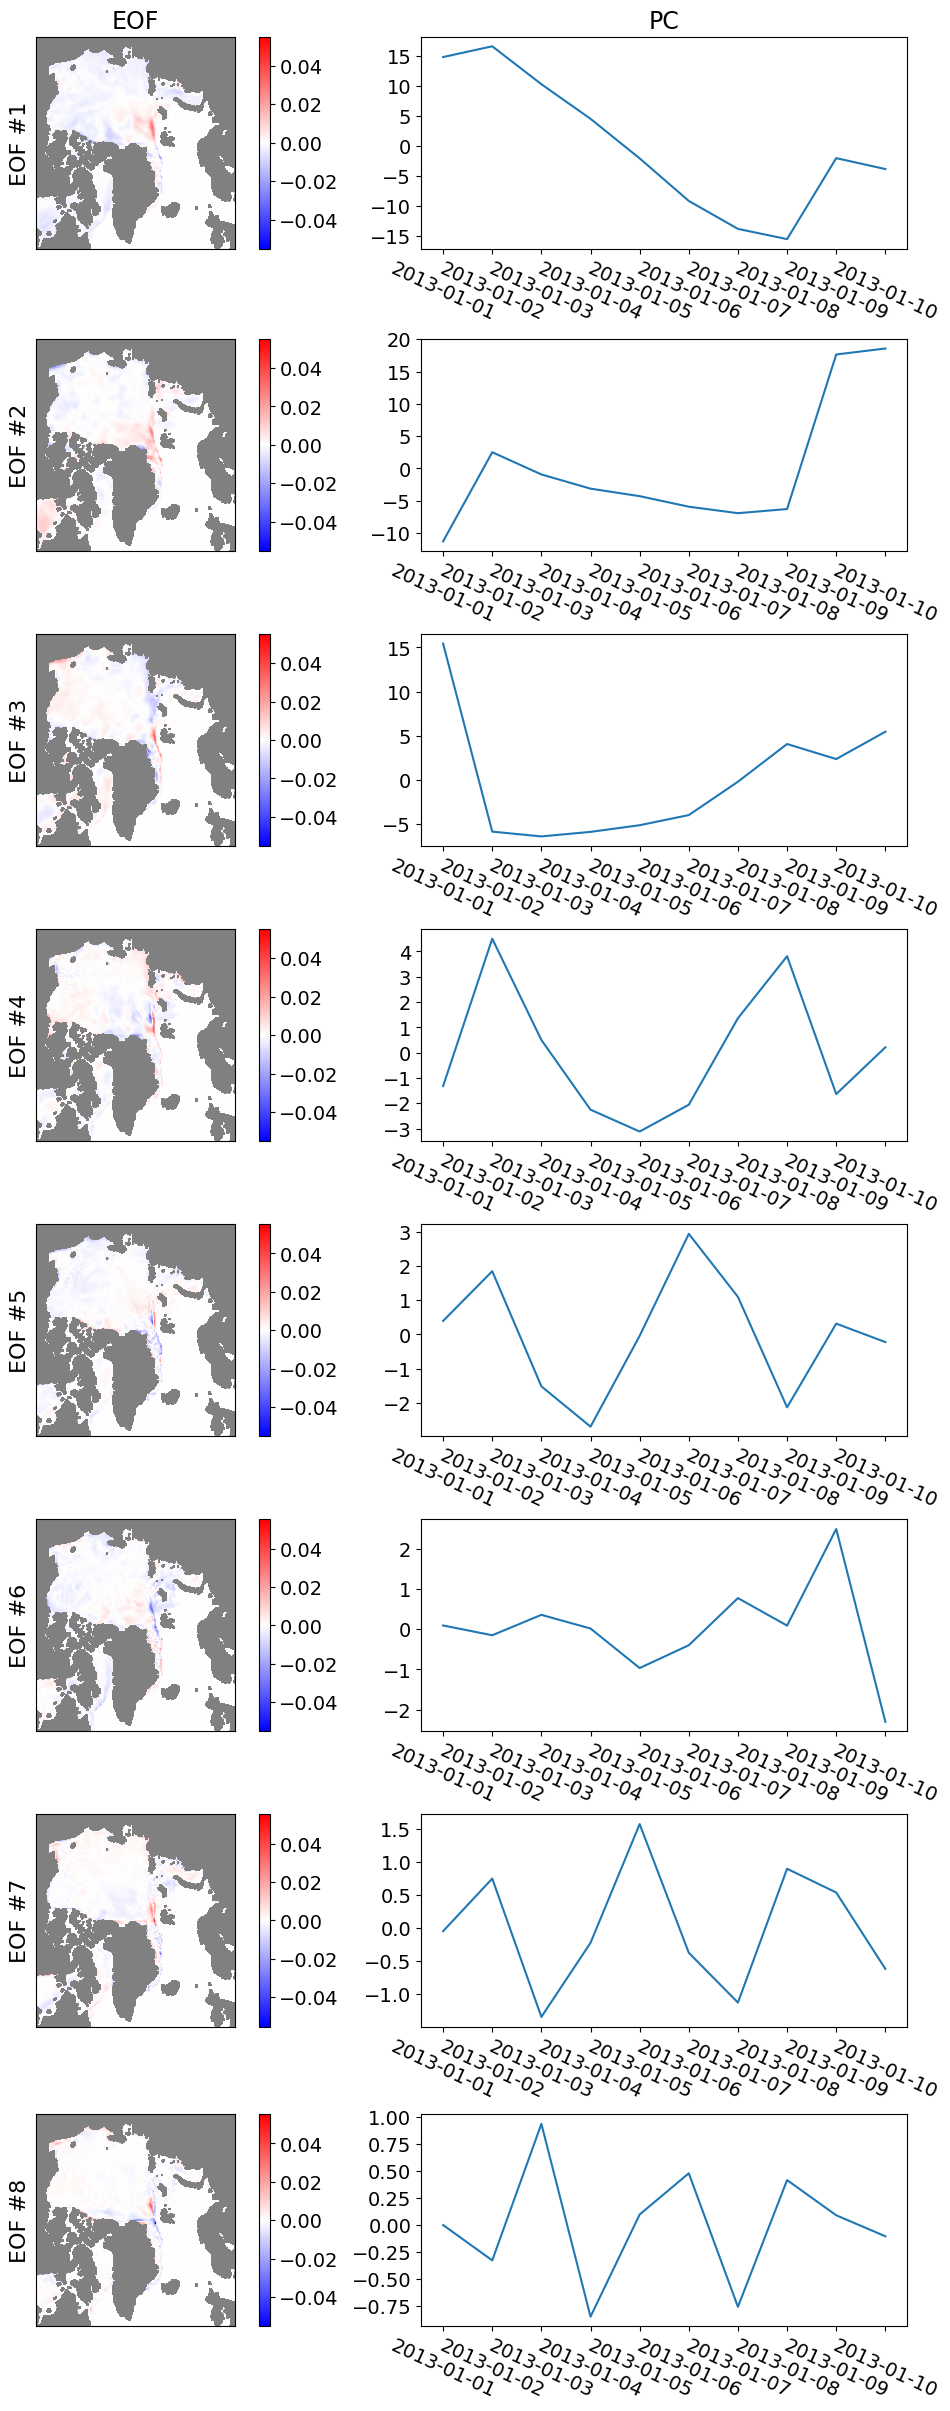

In [40]:
# filename = f'{rootdir}{fig_dir}{target_field}_PCA{n_components}_SITass_EOF_PC_{years[0]}_{years[-1]}{suffix}.png'
visualize_pca.plot_save_eof(chrono_a, n_components, n_components, EOF2d_a, PCs_a, target_field, 0, showfig=True)

# Visualize cumulative explained variance of the first axe
# filename = f'{rootdir}{fig_dir}{target_field}_PCA{n_components}_Xa_cumvar_{years[0]}_{years[-1]}{suffix}.png'
# visualize_pca.plot_pca_variance(n_components, pca_a, target_field, True, filename)